# **INFO284 Machine Learning Exam, spring 2025**
## **Task 2 - Convoluonal neural networks**
test

### Loading dataset

In [24]:
%pip install tensorflow
from tensorflow.keras.applications import InceptionV3

# Load the pretrained model
pretrained_model = InceptionV3(input_shape=(224,224,3), 
                               weights='imagenet', 
                               include_top=False)

# Print model summary to verify
# pretrained_model.summary()


In [25]:
import tensorflow as tf
print(tf.keras.utils.get_file("inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5", 
							  origin="https://storage.googleapis.com/tensorflow/keras-applications/inception_v3/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"))

C:\Users\Eier\.keras\datasets\inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5


In [26]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

# Load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("Training data shape:", x_train.shape)  # Should print (50000, 32, 32, 3)
print("Test data shape:", x_test.shape)  # Should print (10000, 32, 32, 3)


Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


### Data generator

In [40]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import numpy as np

# Convert labels to binary class matrices
y_train_binary = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_binary = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Create a function for resizing and normalizing on the fly
def data_generator(x, y, batch_size=64):
    while True:
        for i in range(0, len(x), batch_size):
            # Resize each image on-the-fly
            batch_x = np.array([tf.image.resize(img, (224, 224)).numpy() for img in x[i:i+batch_size]])
            batch_y = y[i:i+batch_size]
            # Normalize images (scale to 0-1)
            batch_x = batch_x / 255.0
            yield batch_x, batch_y

# Define batch size
batch_size = 64

# Create the generators
train_gen = data_generator(x_train, y_train_binary, batch_size)
test_gen = data_generator(x_test, y_test_binary, batch_size)


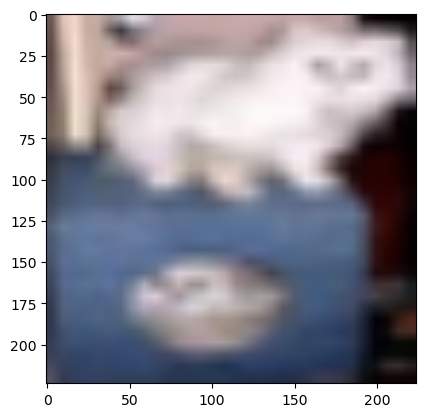

In [42]:
import matplotlib.pyplot as plt

sample_batch_x, sample_batch_y = next(train_gen)
# Get a sample image from the batch
plt.imshow(sample_batch_x[38])  # Show the first image in the batch
plt.show()
